In [1]:
import xarray as xr
from dask.distributed import Client
import time
import datetime as dt
import warnings
warnings.filterwarnings('ignore')
import sys
import gc
import numpy as np
sys.setrecursionlimit(100000)

import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import matplotlib.colors as colors
from matplotlib import path
import scipy.io as sio
import cartopy.crs as ccrs
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
import cartopy.feature as cfeature
import seaborn as sns
import cmaps
import seapy

In [110]:
dates_ref = range(15461,15461,3)
list(dates_ref)
inner = 20

In [111]:

#define your observation, forward simulation and da simulation root path

mydaroot = '/Volumes/LC_1/roms4dvar_ecs/i4dvar_outputs/'
mod_prefix = "STORAGE/mod/ocean_ecs_mod_"
grd_file = '/Volumes/TO_1/roms4dvar_ecs/i4dvar_outputs/workspace_geopolarsst/STORAGE/prior/ocean_ecs_fwd_15461_outer0.nc'
#define your workspace 
da_workspace = {}
data_len = {}
J_ini = {}
J_fnl = {}
J_nl = {}
N_obs = {}

da_workspace['sst'] = 'workspace_sstbgqc/'
da_workspace['all'] = 'workspace_withcruise/'
for iexp in ['sst','all']:
    
    J_ini[iexp] = np.zeros([len(dates_ref)])
    J_fnl[iexp] = np.zeros([len(dates_ref)])
    J_nl[iexp] = np.zeros([len(dates_ref)])
    N_obs[iexp] = np.zeros([len(dates_ref)])
    
    




#since this is a vertical profile validation, full fwd file is needed


In [40]:
needed_field = ['TL_costfuncion', 
                'back_function',
                'NLcost_function'
               'obs_scale']


                

In [ ]:
# loading poseterior sst

for iexp in ['sst','all']:
    for iwindow, idate in enumerate(dates_ref):
        print(idate)
        dafile_thiswindow = mydaroot+da_workspace[iexp]+mod_prefix+str(idate)+'.nc'
        
        ds_thiswindow = xr.open_dataset(dafile_thiswindow,
                                     engine='netcdf4',                          
                                    )
        J_ini[iexp][iwindow] = ds_thiswindow.TLcost_function.data[0] + ds_thiswindow.back_function.data[-1]
        J_fnl[iexp][iwindow] = ds_thiswindow.TLcost_function.data[-1] + ds_thiswindow.back_function.data[-1]
        J_nl[iexp][iwindow] = ds_thiswindow.NLcost_function.data[-1,0]
        N_obs[iexp][iwindow] = len(np.nonzero(ds_thiswindow.obs_scale.data)[0])
        

15461
15464
15467
15470
15473
15476
15479
15482
15485
15488
15491
15494
15497
15500
15503
15506
15509
15512
15515
15518
15521
15524
15527
15530
15533
15536
15539
15542
15545
15548
15551
15554
15557
15560
15563
15566
15569
15572
15575


In [109]:
ds_thiswindow

<xarray.Dataset>
Dimensions:                 (survey: 1814, state_var: 7, Ninner: 20, Nouter: 1,
                             Ninner+1: 21, three: 3, datum: 14059452,
                             Nouter+1: 2, cost_var: 8, iteration: 21)
Dimensions without coordinates: survey, state_var, Ninner, Nouter, Ninner+1,
                                three, datum, Nouter+1, cost_var, iteration
Data variables: (12/56)
    outer                   int32 ...
    inner                   int32 ...
    Nobs                    (survey) int32 ...
    Nused_obs               (state_var) int32 ...
    obs_mean                (state_var) float64 ...
    obs_std                 (state_var) float64 ...
    ...                      ...
    misfit_initial          (datum) float64 ...
    misfit_final            (datum) float64 ...
    NLcost_function         (Nouter+1, cost_var) float64 1.959e+05 0.0 ... 0.0
    TLcost_function         (iteration) float64 1.959e+05 ... 5.959e+04
    back_function           (iteration) float64 0.0 2.307 6.202 ... 357.9 388.3
    Jmin                    (iteration) float64 ...
Attributes: (12/19)
    type:              ROMS/TOMS 4D-Var output observation processing file
    Algorithm:         I4DVAR
    str_day:           15479.5
    end_day:           15482.5
    str_date:          2012-05-19 12:00:00.00
    end_date:          2012-05-22 12:00:00.00
    ...                ...
    os:                Linux
    cpu:               x86_64
    compiler_system:   gfortran
    compiler_command:  /gpfshddpool/home/rongzengrui/soft/openmpi-4.1.5-aocc/...
    compiler_flags:    -frepack-arrays -O3 -ffast-math -
    history:           ROMS/TOMS, Version 4.1, Tuesday - January 14, 2025 -  ...

In [112]:
J_nl['all'].shape

(141,)

In [37]:
np.nonzero(xr.open_dataset(mydaroot+da_workspace[iexp]+mod_prefix+str(dates_ref[0])+'.nc',
                                     engine='netcdf4',                          
                                    )['innovation'].data)

(array([     0,      1,      2, ..., 132205, 132206, 132207]),)

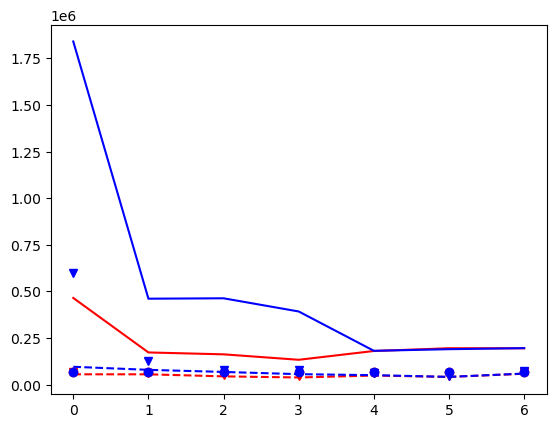

In [105]:
plt.plot(J_ini['sst'],'r')
plt.plot(J_fnl['sst'],'r--')
plt.plot(J_nl['sst'],'rv')
plt.plot(N_obs['sst']/2,'ro')
plt.plot(J_ini['all'],'b')
plt.plot(J_fnl['all'],'b--')
plt.plot(J_nl['all'],'bv')
plt.plot(N_obs['all']/2,'bo')